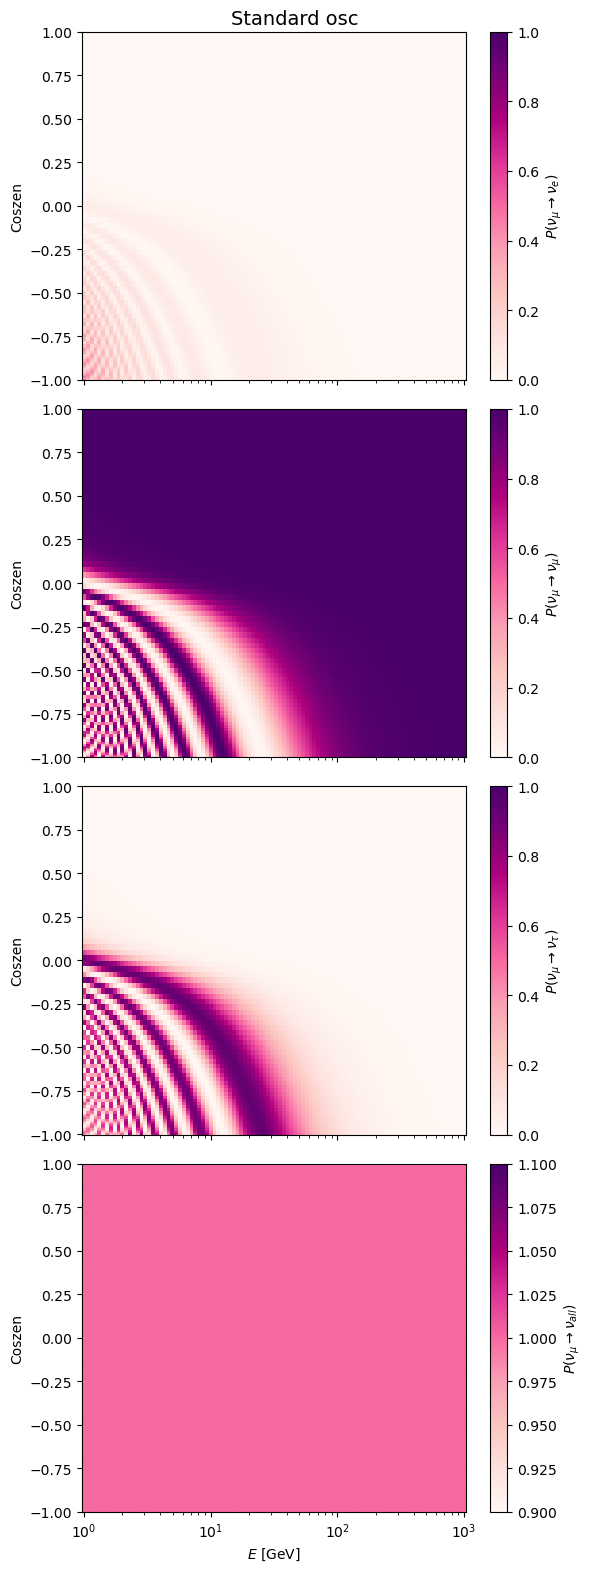

In [1]:
import sys, os, collections
import numpy as np
from deimos.wrapper.osc_calculator import *
from deimos.utils.plotting import *
from deimos.utils.coordinates import *

'''
Set detector location and location of the neutrino source on the sky
'''



#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 0

#Resolution
num = 100

#Define neutrinos 
ra = np.full(num,30)
dec = np.linspace(-90,90,num)
date_str = "July 17, 2022, 23:20"
initial_flavor, nubar = 1, False # muon neutrino
E_GeV = np.geomspace(1., 1e3, num=num)


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen, _, _ = coordinates.get_coszen_altitude_and_azimuth(
    ra_deg = ra,
    dec_deg = dec,
    date_str = date_str
)

'''
Plot neutrino oscillations @IceCube
'''


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
    )

    # Use vacuum
    calculator.set_matter("vacuum")


    #
    # Plot oscillation vs energy
    #

    # Calc osc probs and plot, without new physics
    #calculator.set_std_osc()
    #fig, ax, _, = calculator.plot_right_ascension_vs_energy_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="black", label="Standard osc")
    #fig.savefig("standard_oscillation_varying_ra_verification.pdf")
    
    # Calc osc probs and plot, with SME
    a_eV = np.zeros((3,3,3))
    c = np.zeros((3,3,3))
    e = np.zeros((3,3,3))

    
    calculator.set_sme(a_eV=a_eV, c=c,e=e)
    
    # Set detector location
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra_deg = ra,
                                  dec_deg = dec,
                                  date_str = date_str)
    calculator.set_std_osc()
    fig, ax, array_probs, = calculator.plot_declination_vs_energy_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="orange", label="SME", linestyle="--")
    #fig.savefig("Standard_oscillation_varying_ra_vacuum.pdf")
    #label=f"SME (a (in eV) = {tuple(f"{val:.3g}" for val in a)}, c = {tuple(f"{val:.3g}" for val in c)})"                                                                                                                                            

    #
    # Done
    #

/home/enrico/anaconda3/envs/deimos/lib/python3.11/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `mxstep`.
  warn("The following arguments have no effect for a chosen solver: {}."


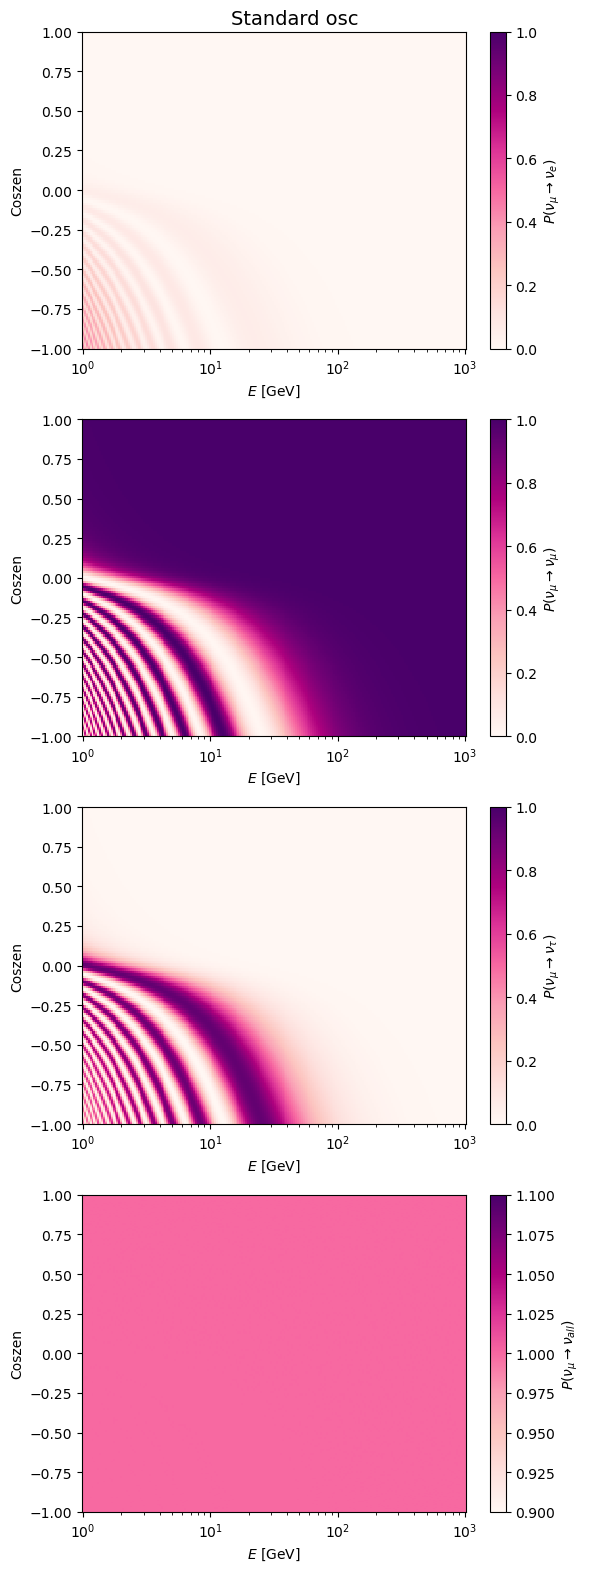

In [1]:
import sys, os, collections
import numpy as np
from deimos.wrapper.osc_calculator import *
from deimos.utils.plotting import *
from deimos.utils.coordinates import *

'''
Set detector location and location of the neutrino source on the sky
'''



#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 0

#Resolution
num = 200

#Define neutrinos 
ra = np.full(num,30)
dec = np.linspace(-90,90,num)
date_str = "July 17, 2022, 23:20"
initial_flavor, nubar = 1, False # muon neutrino
E_GeV = np.geomspace(1., 1e3, num=num)


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen, _, _ = coordinates.get_coszen_altitude_and_azimuth(
    ra_deg = ra,
    dec_deg = dec,
    date_str = date_str
)

'''
Plot neutrino oscillations @IceCube
'''


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
        solver="solve_ivp",
        method="DOP853"
    )

    # Use vacuum
    calculator.set_matter("vacuum")


    #
    # Plot oscillation vs energy
    #

    # Calc osc probs and plot, without new physics
    #calculator.set_std_osc()
    #fig, ax, _, = calculator.plot_right_ascension_vs_energy_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="black", label="Standard osc")
    #fig.savefig("standard_oscillation_varying_ra_verification.pdf")
    
    # Calc osc probs and plot, with SME
    a_eV = np.zeros((3,3,3))
    c = np.zeros((3,3,3))

    
    calculator.set_sme(a_eV=a_eV, c=c)
    
    # Set detector location
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra_deg = ra,
                                  dec_deg = dec,
                                  date_str = date_str)
    calculator.set_std_osc()
    fig, ax, array_probs, = calculator.plot_declination_vs_energy_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="orange", label="SME", linestyle="--")
    fig.savefig("Standard_oscillation_varying_ra_vacuum.pdf")
    #label=f"SME (a (in eV) = {tuple(f"{val:.3g}" for val in a)}, c = {tuple(f"{val:.3g}" for val in c)})"                                                                                                                                            

    #
    # Done
    #

/media/enrico/DellPortableHardDrive/Ubuntu/Documents/IceCube-NBI/deimos/deimos/wrapper/osc_calculator.py:597: UserWarning: The coszen argument was ignored. Zenith angle was calculated from RA and declination.
  warnings.warn("The coszen argument was ignored. Zenith angle was calculated from RA and declination.")


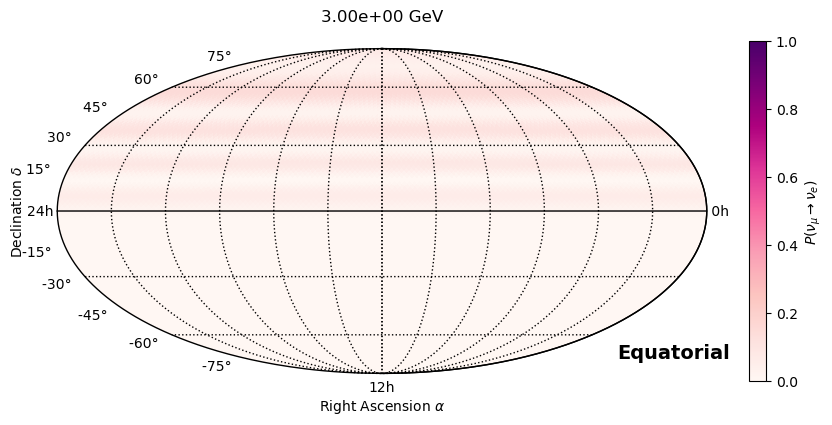

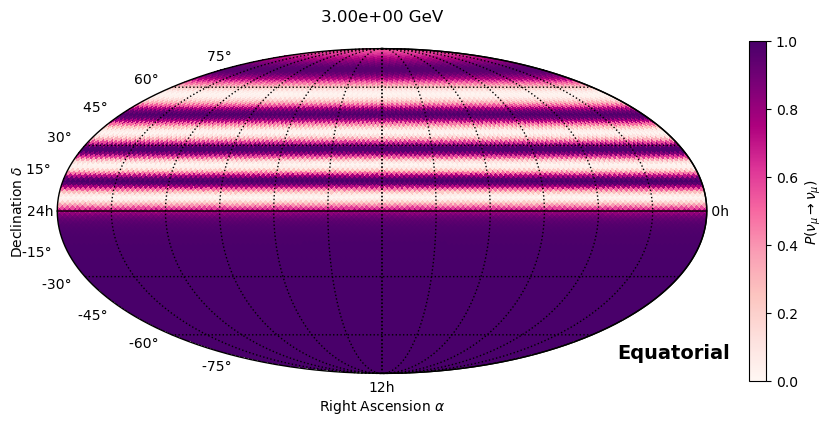

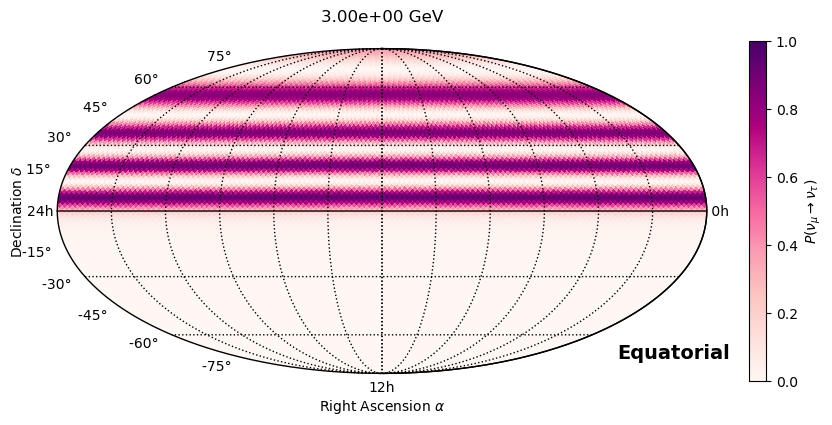

/media/enrico/DellPortableHardDrive/Ubuntu/Documents/IceCube-NBI/deimos/deimos/wrapper/osc_calculator.py:2000: UserWarning: Values of the sum of the difference of the oscillation probabilities outside the range [-0.1, 0.1].
  warnings.warn("Values of the sum of the difference of the oscillation probabilities outside the range [-0.1, 0.1].", UserWarning)


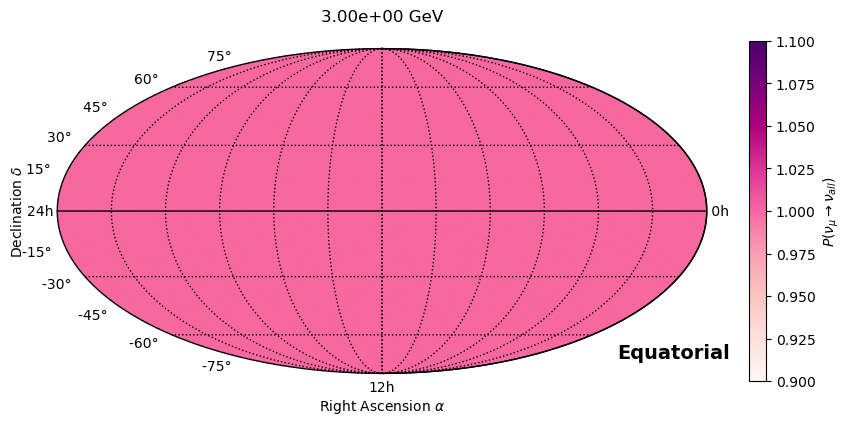

In [2]:
import sys, os, collections
import numpy as np
from deimos.wrapper.osc_calculator import *
from deimos.utils.plotting import *
from deimos.utils.coordinates import *

'''
Set detector location and location of the neutrino source on the sky
'''

#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 0


#Resolution
num =1

#Neutrino source
ra = np.full(num,180)
dec = np.linspace(-90,90,num)
date_str = "July 17, 2022, 23:20"
utc_offset_hr = 0


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen,_, azimuth = coordinates.get_coszen_altitude_and_azimuth(
    ra_deg = ra,
    dec_deg = dec,
    date_str = date_str
)

#print('coszen = ', coszen)


'''
Plot neutrino oscillations @IceCube
'''


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
    )

    # Use vacuum
    calculator.set_matter("vacuum")
    

    #
    # Define neutrino
    #

    initial_flavor, nubar = 1, False # muon neutrino
    E_GeV = np.geomspace(3e0, 1e1, num=num)
    coszen = coszen
        
    # Calc osc probs and plot, with SME
    a_eV = np.zeros((3,3,3))
    c = np.zeros((3,3,3))
    # Set flavour independent values
    a_eV[0,:,:] = 0
    calculator.set_sme(a_eV=a_eV, c=c)


    #
    # Plot oscillation vs energy
    #
 
    # Calc osc probs and plot, with SME
    calculator.set_sme(a_eV=a_eV, c=c)
    
    
    # Set detector location
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra_deg = ra,
                                  dec_deg = dec,
                                  date_str = date_str)
    
    calculator.plot_osc_prob_skymap_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, resolution=32)
    
    # Save the second figure as a PDF
    fig.savefig("skymap_standard_osc_3e0GeV.pdf")
    #label=f"SME (a (in eV) = {tuple(f"{val:.3g}" for val in a)}, c = {tuple(f"{val:.3g}" for val in c)})"                                                                                                                                            

    #
    # Done
    #

In [ ]:
import sys, os, collections
import numpy as np
from deimos.wrapper.osc_calculator import *
from deimos.utils.plotting import *
from deimos.utils.coordinates import *

'''
Set detector location and location of the neutrino source on the sky
'''

#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 0


#Resolution
num =3

#Neutrino source
ra = np.full(num,180)
dec = np.linspace(-90,90,num)
date_str = "July 17, 2022, 23:20"
utc_offset_hr = 0


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen,_, azimuth = coordinates.get_coszen_altitude_and_azimuth(
    ra_deg = ra,
    dec_deg = dec,
    date_str = date_str
)

#print('coszen = ', coszen)


'''
Plot neutrino oscillations @IceCube
'''


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
    )

    # Use vacuum
    calculator.set_matter("vacuum")
    

    #
    # Define neutrino
    #

    initial_flavor, nubar = 1, False # muon neutrino
    E_GeV = np.geomspace(1e0, 1e2, num=num)
    coszen = coszen
        
    # Calc osc probs and plot, with SME
    a_eV = np.zeros((3,3,3))
    c = np.zeros((3,3,3))
    # Set flavour independent values
    a_eV[0,:,:] = 0
    calculator.set_sme(a_eV=a_eV, c=c)


    #
    # Plot oscillation vs energy
    #
 
    # Calc osc probs and plot, with SME
    calculator.set_sme(a_eV=a_eV, c=c)
    
    
    # Set detector location
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra_deg = ra,
                                  dec_deg = dec,
                                  date_str = date_str)

    calculator.plot_osc_prob_skymap_2D(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, resolution=32)
    
    # Save the second figure as a PDF
    #fig.savefig("SME_oscillation.pdf")
    #label=f"SME (a (in eV) = {tuple(f"{val:.3g}" for val in a)}, c = {tuple(f"{val:.3g}" for val in c)})"                                                                                                                                            

    #
    # Done
    #